In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import keras as tf
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


c:\Users\DELL\anaconda3\envs\tf\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
b = np.load('mnist.npz')

In [3]:
X_test  = b['x_test']
X_train  = b['x_train']
y_train = b['y_train']
y_test = b['y_test']

In [4]:
pixel_numbers  = X_train.shape[1]*X_train.shape[1]
print(pixel_numbers)
X_train = X_train.reshape(X_train.shape[0],pixel_numbers).astype('float32')
X_test = X_test.reshape(X_test.shape[0],pixel_numbers).astype('float32')

784


In [5]:
X_train = X_train/255
X_test = X_test/255
y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)
num_classes=y_train.shape[1]
print(num_classes)

10


In [6]:
from keras.engine.sequential import input_layer
model  = Sequential()
model.add(Dense(pixel_numbers, input_dim=pixel_numbers,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [7]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200,verbose=2)

Epoch 1/10
300/300 - 4s - loss: 0.2774 - accuracy: 0.9216 - val_loss: 0.1404 - val_accuracy: 0.9589 - 4s/epoch - 14ms/step
Epoch 2/10
300/300 - 2s - loss: 0.1111 - accuracy: 0.9675 - val_loss: 0.0904 - val_accuracy: 0.9731 - 2s/epoch - 8ms/step
Epoch 3/10
300/300 - 3s - loss: 0.0723 - accuracy: 0.9787 - val_loss: 0.0887 - val_accuracy: 0.9716 - 3s/epoch - 9ms/step
Epoch 4/10
300/300 - 3s - loss: 0.0512 - accuracy: 0.9852 - val_loss: 0.0705 - val_accuracy: 0.9779 - 3s/epoch - 9ms/step
Epoch 5/10
300/300 - 4s - loss: 0.0366 - accuracy: 0.9897 - val_loss: 0.0628 - val_accuracy: 0.9815 - 4s/epoch - 12ms/step
Epoch 6/10
300/300 - 4s - loss: 0.0266 - accuracy: 0.9932 - val_loss: 0.0629 - val_accuracy: 0.9798 - 4s/epoch - 13ms/step
Epoch 7/10
300/300 - 4s - loss: 0.0203 - accuracy: 0.9949 - val_loss: 0.0638 - val_accuracy: 0.9806 - 4s/epoch - 13ms/step
Epoch 8/10
300/300 - 4s - loss: 0.0155 - accuracy: 0.9960 - val_loss: 0.0632 - val_accuracy: 0.9815 - 4s/epoch - 13ms/step
Epoch 9/10
300/300 

In [8]:
score= model.evaluate(X_test, y_test, verbose=0)
print('The error is: %.2f%%'%(100-score[1]*100))

The error is: 1.80%


1/1 [==============================] - 0s 121ms/step
Predicted digit: 5


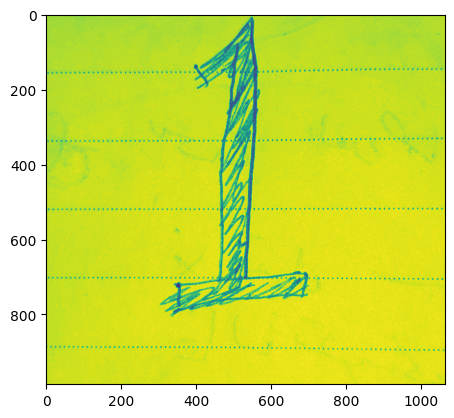

In [9]:
from PIL import Image
input_image = Image.open('r.jpg').convert('L')
plt.plot()
plt.imshow(input_image)
input_image = input_image.resize((28, 28))
input_image = np.array(input_image) 
input_image = input_image.reshape(1, 784)
input_image = input_image.astype('float32') / 255
predictions = model.predict(input_image)
predicted_digit = np.argmax(predictions)
print("Predicted digit:", predicted_digit)